In [46]:
import numpy as np
import pandas as pd
import os
from scipy.optimize import fsolve, minimize
import matplotlib.pyplot as plt

In [47]:
file=r'h4-DpctcEem1ZQ7C4qP0yA_542275b246a44f0993182797fe39b0fb_FERM_3_Assignment_2_Solutions.xlsx'
path=r'C:\Users\tonyfong\Downloads'
df=pd.read_excel(os.path.join(path,file))
df=df.set_index('date')

In [48]:
def calculate_portfolio_return_and_variance(df, min_return):
    def minimize_variance_objective(allocation, cov_matrix):
        return allocation @ cov_matrix @ allocation

    n = len(df.columns)
    initial_allocation = np.ones(n) / n
    cov_matrix = df.cov()
    mean_returns = df.mean()
    shirinkage_mean_returns= mean_returns * 0.9 + mean_returns.mean() * 0.1

    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'ineq', 'fun': lambda x: x @ shirinkage_mean_returns - min_return}
    ]
    bounds = [(0, 1) for _ in range(n)]

    # def jacobian(allocation, cov_matrix):
    #     return 2 * cov_matrix @ allocation

    result = minimize(
        minimize_variance_objective,
        initial_allocation,
        args=(cov_matrix,),
        method='SLSQP',
        bounds=bounds,
        # jac=jacobian,
        constraints=constraints,
        options={'maxiter': 100000, 'ftol': 1e-1000}
    )

    optimal_allocation = result.x
    portfolio_return =  optimal_allocation @ mean_returns
    portfolio_variance = optimal_allocation @ cov_matrix @ optimal_allocation
    # print("Optimal allocation:", optimal_allocation)
    # print("Portfolio return:", optimal_allocation @ mean_returns)
    # print("Portfolio variance:", optimal_allocation @ cov_matrix @ optimal_allocation)
    return portfolio_return, portfolio_variance#, optimal_allocation

In [49]:
returns=np.arange(1,100)*0.001
results=[calculate_portfolio_return_and_variance(df, r) for r in returns]

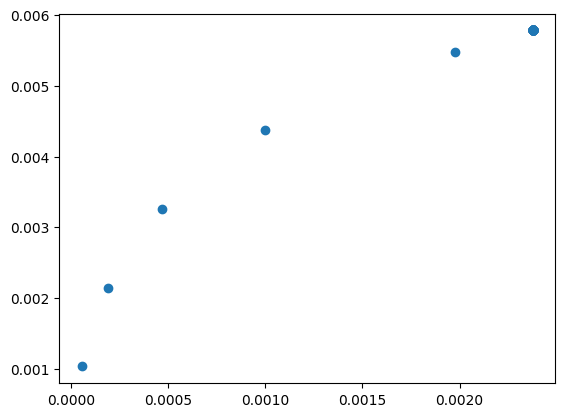

In [50]:
plt.scatter([i[1] for i in results],
    [i[0] for i in results])